In [1]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tashtyp
Processing Record 2 of Set 1 | mitu
Processing Record 3 of Set 1 | kargil
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | zlatoustovsk
City not found. Skipping...
Processing Record 7 of Set 1 | pilar
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | jasper
Processing Record 19 of Set 1 | tarpa
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | pingxiang
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processi

Processing Record 41 of Set 4 | polunochnoye
Processing Record 42 of Set 4 | horsham
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | napier
Processing Record 46 of Set 4 | maragogi
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | pangody
Processing Record 49 of Set 4 | hualmay
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | brainerd
Processing Record 2 of Set 5 | camocim
Processing Record 3 of Set 5 | terenga
City not found. Skipping...
Processing Record 4 of Set 5 | galle
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | samana
Processing Record 7 of Set 5 | tessalit
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 of Set 5 | zhigansk
Processing Record 10 of Set 5 | morondava
Processing Record 11 of Set 5 | noshiro
Processing Record 12 of Set 5 | safita
Processing Record 13 of Set 5 | nanakuli
Processing Record

Processing Record 36 of Set 8 | labuhan
Processing Record 37 of Set 8 | telford
Processing Record 38 of Set 8 | esna
Processing Record 39 of Set 8 | matay
Processing Record 40 of Set 8 | bridlington
Processing Record 41 of Set 8 | zyryanka
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | broome
Processing Record 44 of Set 8 | meulaboh
Processing Record 45 of Set 8 | provost
Processing Record 46 of Set 8 | port hedland
Processing Record 47 of Set 8 | bani walid
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | namtsy
Processing Record 50 of Set 8 | bemidji
Processing Record 1 of Set 9 | portland
Processing Record 2 of Set 9 | leningradskiy
Processing Record 3 of Set 9 | kaeo
Processing Record 4 of Set 9 | sorland
Processing Record 5 of Set 9 | orotukan
Processing Record 6 of Set 9 | madisonville
Processing Record 7 of Set 9 | los llanos de aridane
Processing Record 8 of Set 9 | baghdad
Processing Record 9 of Set 9 |

Processing Record 24 of Set 12 | falealupo
City not found. Skipping...
Processing Record 25 of Set 12 | iquique
Processing Record 26 of Set 12 | santa maria da vitoria
Processing Record 27 of Set 12 | ulladulla
Processing Record 28 of Set 12 | dunmore east
Processing Record 29 of Set 12 | akyab
Processing Record 30 of Set 12 | coquimbo
Processing Record 31 of Set 12 | sandanski
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | atambua
Processing Record 34 of Set 12 | great yarmouth
Processing Record 35 of Set 12 | chute-aux-outardes
Processing Record 36 of Set 12 | kulhudhuffushi
Processing Record 37 of Set 12 | terrace bay
Processing Record 38 of Set 12 | srikakulam
Processing Record 39 of Set 12 | tateyama
Processing Record 40 of Set 12 | grindavik
Processing Record 41 of Set 12 | plettenberg bay
Processing Record 42 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 12 | warmbad
Processing Record 44 of Set 12 | solnechnyy
Processing Reco

In [6]:
len(city_data)

567

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tashtyp,52.7939,89.8983,13.87,87,98,0.96,RU,2021-01-16 21:28:31
1,Mitu,1.1983,-70.1733,83.17,82,85,2.93,CO,2021-01-16 21:28:31
2,Kargil,34.5667,76.1000,-2.92,64,0,1.74,IN,2021-01-16 21:28:32
3,Ushuaia,-54.8000,-68.3000,57.20,62,75,16.11,AR,2021-01-16 21:28:32
4,Mataura,-46.1927,168.8643,70.00,50,100,15.01,NZ,2021-01-16 21:28:32
5,Pilar,-9.5972,-35.9567,78.80,73,20,11.50,BR,2021-01-16 21:28:32
6,Port Alfred,-33.5906,26.8910,69.01,83,2,8.99,ZA,2021-01-16 21:28:32
7,Avarua,-21.2078,-159.7750,84.20,74,20,8.05,CK,2021-01-16 21:28:32
8,Hobart,-42.8794,147.3294,53.60,54,75,10.36,AU,2021-01-16 21:28:32
9,Daru,-9.0763,143.2092,78.12,92,100,8.84,PG,2021-01-16 21:28:32


In [8]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tashtyp,RU,2021-01-16 21:28:31,52.7939,89.8983,13.87,87,98,0.96
1,Mitu,CO,2021-01-16 21:28:31,1.1983,-70.1733,83.17,82,85,2.93
2,Kargil,IN,2021-01-16 21:28:32,34.5667,76.1000,-2.92,64,0,1.74
3,Ushuaia,AR,2021-01-16 21:28:32,-54.8000,-68.3000,57.20,62,75,16.11
4,Mataura,NZ,2021-01-16 21:28:32,-46.1927,168.8643,70.00,50,100,15.01
5,Pilar,BR,2021-01-16 21:28:32,-9.5972,-35.9567,78.80,73,20,11.50
6,Port Alfred,ZA,2021-01-16 21:28:32,-33.5906,26.8910,69.01,83,2,8.99
7,Avarua,CK,2021-01-16 21:28:32,-21.2078,-159.7750,84.20,74,20,8.05
8,Hobart,AU,2021-01-16 21:28:32,-42.8794,147.3294,53.60,54,75,10.36
9,Daru,PG,2021-01-16 21:28:32,-9.0763,143.2092,78.12,92,100,8.84


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

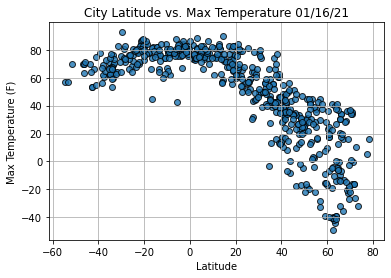

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

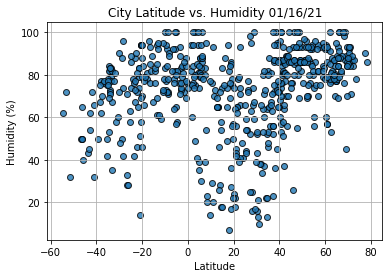

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

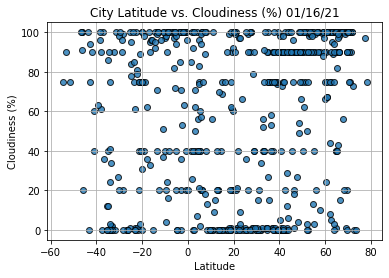

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

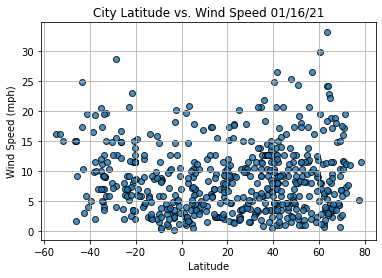

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

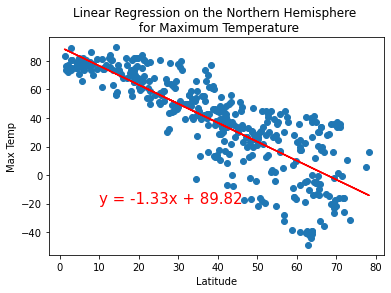

The r-value is: -0.827


In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-20))

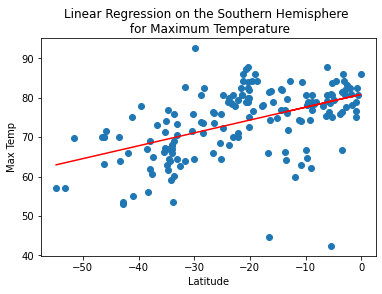

The r-value is: 0.501


In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-25,100))

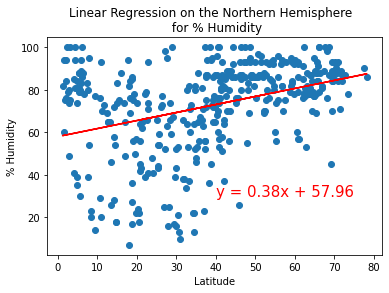

The r-value is: 0.362


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere  \n for % Humidity', 
                       '% Humidity',(40,30))

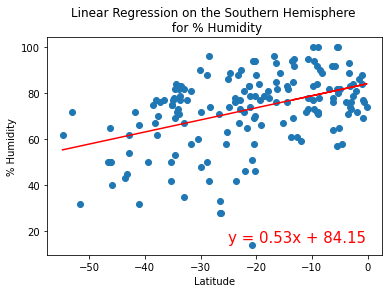

The r-value is: 0.429


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-25,15))

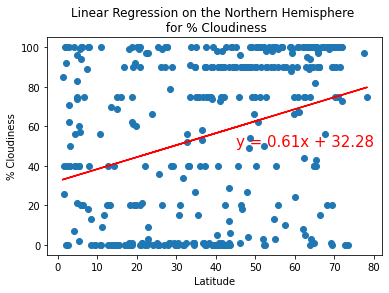

The r-value is: 0.305


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(45,50))

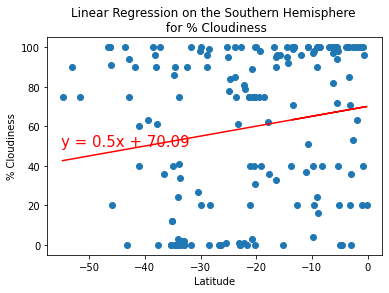

The r-value is: 0.171


In [24]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,50))

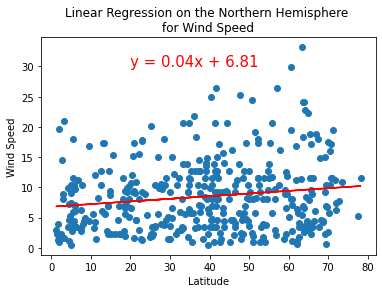

The r-value is: 0.154


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(20,30))

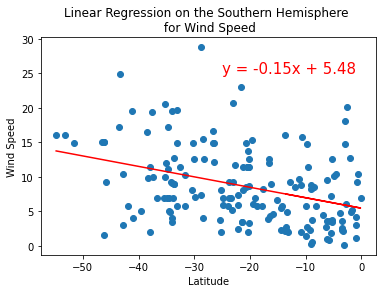

The r-value is: -0.367


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-25,25))